In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_precio_petroleo = pd.read_csv("datos_precio_petroleo.csv")
df_tipo_cambio_dolar = pd.read_csv("datos_cambio_dolar.csv")

In [3]:
# Estadísticas descriptivas
print(df_precio_petroleo.describe())
print(df_tipo_cambio_dolar.describe())

             Close  prev_day_close  prev_week_close  prev_month_close  \
count  1505.000000     1505.000000      1505.000000       1505.000000   
mean     55.402179       55.405555        55.406804         55.394219   
std      12.335200       12.334783        12.334453         12.340921   
min      19.330000       19.330000        19.330000         19.330000   
25%      47.189999       47.189999        47.189999         47.189999   
50%      55.320000       55.349998        55.349998         55.349998   
75%      64.269997       64.269997        64.269997         64.269997   
max      86.290001       86.290001        86.290001         86.290001   

       prev_qtr_close  price_change_pct  weekly_change_pct  \
count     1505.000000       1505.000000        1505.000000   
mean        55.788844          0.000328           0.001526   
std         12.168139          0.028070           0.064034   
min         19.330000         -0.244036          -0.346959   
25%         47.959999         -0

In [4]:
print("Estructura de df_precio_petroleo:")
print(df_precio_petroleo.info())
print("\nEstructura de df_tipo_cambio_dolar:")
print(df_tipo_cambio_dolar.info())

Estructura de df_precio_petroleo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 23 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Date                                                                         1505 non-null   object 
 1   Close                                                                        1505 non-null   float64
 2   prev_day_close                                                               1505 non-null   float64
 3   prev_week_close                                                              1505 non-null   float64
 4   prev_month_close                                                             1505 non-null   float64
 5   prev_qtr_close                                                               1505 non-null   float64
 6   price_

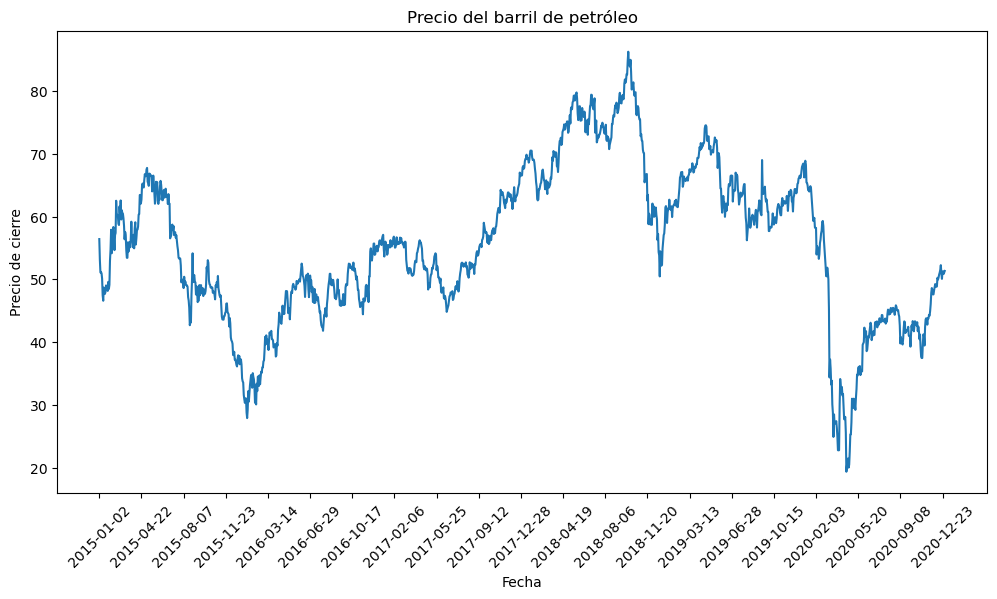

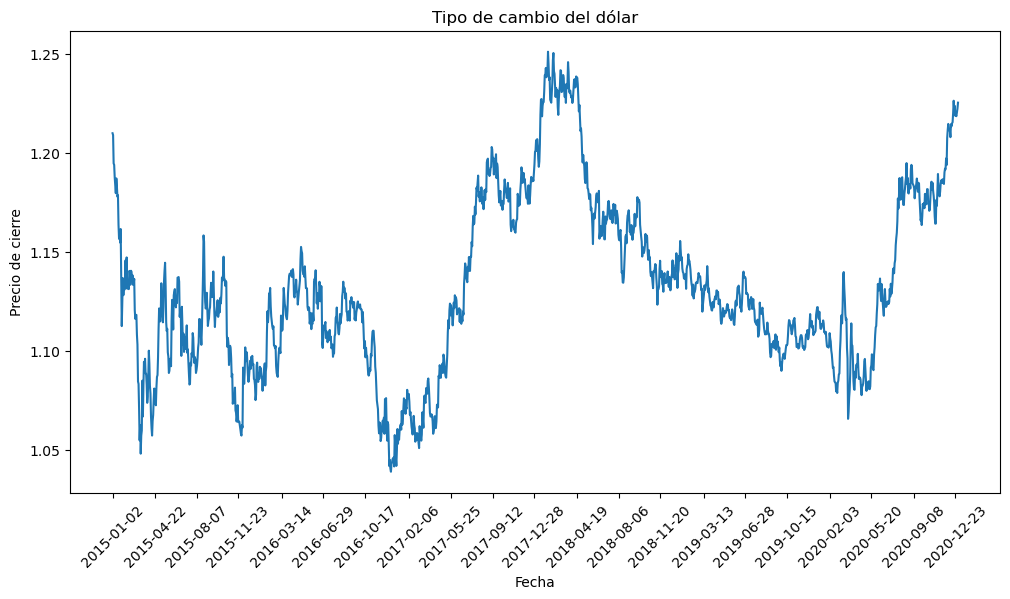

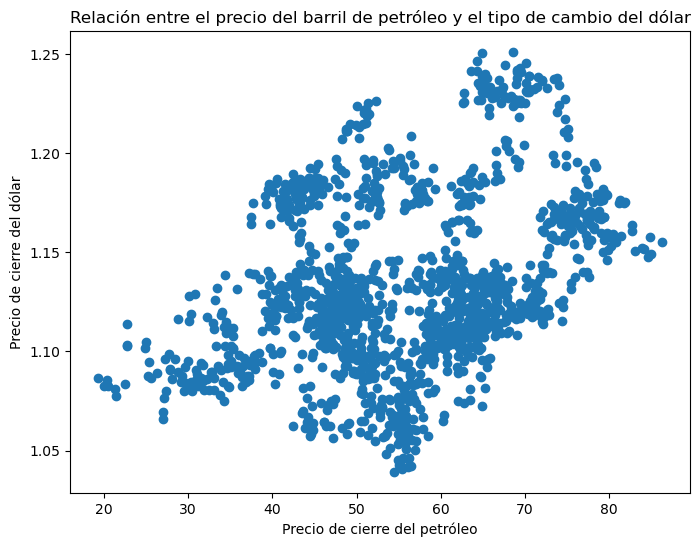

In [5]:
#Exploración visual de los datos

# Obtener solo algunas fechas para mostrar en la leyenda
num_dates = 20  # Número de fechas a mostrar
step = len(df_precio_petroleo) // num_dates
dates = df_precio_petroleo['Date'][::step]

# Gráfico de línea del precio del barril de petróleo
plt.figure(figsize=(12, 6))
plt.plot(df_precio_petroleo['Date'], df_precio_petroleo['Close'])
plt.title('Precio del barril de petróleo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.xticks(dates, rotation=45)
plt.show()

# Gráfico de línea del tipo de cambio del dólar
plt.figure(figsize=(12, 6))
plt.plot(df_tipo_cambio_dolar['Date'], df_tipo_cambio_dolar['Close'])
plt.title('Tipo de cambio del dólar')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.xticks(dates, rotation=45)
plt.show()

combined_df = pd.merge(df_precio_petroleo, df_tipo_cambio_dolar, on='Date', how='inner')
#Los junto en un mismo df porque no tienen la misma longitud ambos precios
#El dolar tiene 1562 filas y el petroleo 1502

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Close_x'], combined_df['Close_y'])
plt.title('Relación entre el precio del barril de petróleo y el tipo de cambio del dólar')
plt.xlabel('Precio de cierre del petróleo')
plt.ylabel('Precio de cierre del dólar')
plt.show()

In [23]:
correlation_df = pd.concat([df_precio_petroleo['Close'], df_tipo_cambio_dolar['Close']], axis=1)
correlation = correlation_df.corr(method='pearson')
print("Coeficiente de correlación entre el precio del barril de petróleo y el tipo de cambio del dólar:")
print(correlation)

Coeficiente de correlación entre el precio del barril de petróleo y el tipo de cambio del dólar:
          Close     Close
Close  1.000000  0.476041
Close  0.476041  1.000000
